[View in Colaboratory](https://colab.research.google.com/github/humber8/machine_learning/blob/master/Lab1.ipynb)

# Práctica de Sistemas Recomendadores 1: Pyreclab

En este práctico vamos a utilizar la biblioteca de Python [pyreclab](https://github.com/gasevi/pyreclab) desarrollado por los Laboratorios IALab y SocVis de la Pontificia Universidad Católica de Chile, para aprender sobre algoritmos básicos y tradicionales de sistemas de recomendacion:


*   Most Popular
*   Item Average Rating
*   User KNN (Filtrado colaborativo basado en usuarios)
*   Item KNN (Filtrado colaborativo basado en items)
*   FunkSVD (Factorización matricial SVD regularizada)


**Autores**: Denis Parra, Gabriel Sepúlveda


# **Nombre Integrante 1**: Francisco Marin Küllmer

---



# **Nombre Integrante 2**: Humberto Alvarez Vilches

#Instrucciones

Vaya ejecutando cada celda presionand el botón de Play o presionando Ctrl+Enter (Linux y Windows) o Command+Enter (Macosx)

1.-  Descargue los siguientes tres archivos, siguiendo los links, a su computador local (u1.base, u1.test, u.item)

https://drive.google.com/file/d/1Anro2DyEgN0sUHXFyxVe2qoSya6hzQSp/view?usp=sharing

https://drive.google.com/file/d/1Awy3QKCdkSpNeRXATqRBUMi56M47Ia0n/view?usp=sharing

https://drive.google.com/file/d/1B7QhEodQ13QlOHOTp9zaa52exlfgAOl3/view?usp=sharing


In [43]:
# Ejecute esta celda. Deberá subir los archivos u1.base, u1.test y u.item que descargó en el paso anterior
from google.colab import files
uploaded = files.upload()

Los archivos u1.base y u1.test tienen tuplas {usuario, item, rating, timestamp}, que es la información de preferencias de usuarios sobre películas en una muestra del dataset [movielens](https://grouplens.org/datasets/movielens/).

Revisemos cómo es uno de estos archivos:

In [59]:
import pandas as pd

train_file = pd.read_csv('u1.base', sep='\t', names = ['userid', 'itemid', 'rating', 'timestamp'], header=None)

train_file.tail()

,userid,itemid,rating,timestamp
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275
79999,943,1330,3,888692465


Por otra parte, para obtener información adicional de cada película tal como *título*, *fecha de lanzamient*o, *género*, etc., cargaremos el archivo de items descargado ( *u.item* ) para poder mapear cada identificador de ítem al conjunto de datos que lo describe.
Revisemos el contenido de este archivo

In [60]:
info_cols = [ 'movieid', 'title', 'release_date', 'video_release_date', 'IMDb_URL', \
              'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', \
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', \
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ]

info_file = pd.read_csv('u.item', sep='|', index_col = 0, names = info_cols, header=None, encoding='latin-1')
#info_file = pd.read_csv('u.item', sep='|',  names = info_cols, header=None, encoding='latin-1')

info_file.head()

,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
# ejemplo de cómo visualizar titulos de peliculas en base a sus IDs
pelis = [5,4,1]
info_file.loc[pelis]['title']

movieid
5       Copycat (1995)
4    Get Shorty (1995)
1     Toy Story (1995)
Name: title, dtype: object

 2.- Instalar ***pyreclab***

In [62]:
!pip install pyreclab

3..- Importar pyreclab y numpy

In [0]:
import pyreclab
import numpy as np

4.- Probar método de recomendación basado en ***Most Popular***

In [0]:
# declarar el objeto recomendador de la clase MostPopular
mymp = pyreclab.MostPopular(dataset = 'u1.base',dlmchar = b'\t',header = False,usercol = 0,itemcol = 1, ratingcol = 2 )


In [0]:
# entrenamos el modelo con los datos existentes

# el método calcula el numero de veces que fue consumido cada item, 
# así, puede luego recomendar los mas populares
mymp.train()

In [66]:
# con este método no podemos predecir ratings, pero sí podemos recomendar
# la recomendación es no personalizada (igual recomendación a todos los usuarios)
reclist = mymp.recommend("100")
print(reclist)

['50', '181', '258', '100', '294', '288', '286', '1', '121', '300']


In [67]:
# con esto podemos ver las recomendaciones con titulo de película
pelis = np.array(reclist).astype(int)
info_file.loc[pelis]['title']

movieid
50                  Star Wars (1977)
181        Return of the Jedi (1983)
258                   Contact (1997)
100                     Fargo (1996)
294                 Liar Liar (1997)
288                    Scream (1996)
286      English Patient, The (1996)
1                   Toy Story (1995)
121    Independence Day (ID4) (1996)
300             Air Force One (1997)
Name: title, dtype: object

5.- Probar método de recomendación basado en ***ItemAvg***

In [0]:
# declarar el objeto recomendador ItemAvg
myitemavg = pyreclab.ItemAvg(dataset = 'u1.base',dlmchar = b'\t',header = False,usercol = 0,itemcol = 1, ratingcol = 2 )


In [0]:
# entrenamos el modelo con los datos existentes
myitemavg.train()

¿Qué cree usted que hace la función train() del método de recomendación ItemAvg() ?

Respuesta:  ***Entrena un modelo de recomendación basado en el promedio de rating POR ITEM***

In [70]:
# Predecir rating que el usuario ID 457 le dará al ítem ID 37
myitemavg.predict("457","37")

2.3333332538604736

Ejecute el mismo comando anterior para predecir esta vez el rating que el usuario 498 dará al item 37 ¿Qué rating da? ¿Cómo se explica este resultado?

In [71]:
myitemavg.predict("498","37")

2.3333332538604736

Respuesta: ***El metodo de recomendación no es personalizado.  Entonces, el método "ItemAvg", realiza un cálculo promedios simples agrupados por películas. No considera el parámetro de usuario (userId) para obtener la predicción.***

In [72]:
# Generar lista de 5 recomendaciones para el usuario con ID 457

reclist_iavg = myitemavg.recommend("457",5)
print(reclist_iavg)

['1500', '1653', '1599', '1189', '1467']


Genere una lista de 11 recomendaciones para el usario ID 478 ¿Cómo se explican las recomendaciones del método para este usuario comparadas con las del usuario 457?

In [73]:
# genera aqui las recomendacion para el usuario 478

reclist_iavg_nueva = myitemavg.recommend("478",11)
print(reclist_iavg_nueva)

['1500', '1653', '1599', '1189', '1467', '1293', '1201', '1122', '1449', '1367', '408']


Respuesta: ***COnsiderando que metodo de recomendación no es personalizado continúa entregando items similares, en el orden calculado por el método ItemAvg ***

¿Cuáles son los títulos de las películas recomendadas por el método **ItemAvg ** para el usuario 457 ? ¿Qué le parecen estas recomendaciones comparadas con el método **MostPopular**?

Respuesta: **Las siguientes son las peliculas que fueron recomendadas para el usuario 457.**

**Nos parece con mayor valor aquellas que fueron recomendadas por MostPopular,  En vez de ItemAvg, dado que este es un simple promedio de rating de cada Item.** 

In [74]:
# (pista) recuerde los comandos usados en el método anterior

pelis = np.array(reclist_iavg_nueva).astype(int)
info_file.loc[pelis]['title']

movieid
1500                            Santa with Muscles (1996)
1653    Entertaining Angels: The Dorothy Day Story (1996)
1599                        Someone Else's America (1995)
1189                                   Prefontaine (1997)
1467                 Saint of Fort Washington, The (1993)
1293                                      Star Kid (1997)
1201           Marlene Dietrich: Shadow and Light (1996) 
1122                       They Made Me a Criminal (1939)
1449                               Pather Panchali (1955)
1367                                         Faust (1994)
408                                 Close Shave, A (1995)
Name: title, dtype: object

### Wilson-score

6.- Probar método de recomendación basado en ***UserKNN***

In [0]:
# declarar el objeto recomendador UserKnn
myUserKnn = pyreclab.UserKnn(dataset = 'u1.base',dlmchar = b'\t',header = False,usercol = 0,itemcol = 1, ratingcol = 2 )


In [0]:
# entrenamos el modelo con los datos existentes
# recuerde que en este metodo puede probar el parámetro k de cantidad de vecinos
# así como la métrica de similaridad (pearson, cosine)
myUserKnn.train(7,'pearson')

In [77]:
# Predecir rating que el usuario ID 457 le dará al ítem ID 37
myUserKnn.predict( "457","37"  )

3.1338725090026855

Según el modelo de recomendación UserKnn, qué rating le dará el usuario 457 al item 37 ?

Respuesta: **El rating obtenido 3.1339.**

In [78]:
# Generar lista de recomendaciones 6 para el usuario con ID 457

reclist_uknn = myUserKnn.recommend("457",5)
print(reclist_uknn)


['1467', '242', '1599', '1642', '1653']


Escriba los nombres de las películas recomendadas por el método knn

Respuesta: **['1467', '242', '1599', '1642', '1653']**

In [79]:
# (pista) recuerde los comandos usados en el método anterior

pelis = np.array(reclist_uknn).astype(int)
info_file.loc[pelis]['title']

movieid
1467                 Saint of Fort Washington, The (1993)
242                                          Kolya (1996)
1599                        Someone Else's America (1995)
1642                             Some Mother's Son (1996)
1653    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object

In [0]:
# Evaluar en base a error de prediccion (RMSE)

k_values = [6, 7,8] # definir distintos valores de vecinos (k)
mae_values = [] # para almacenar resultados de MAE
rmse_values = [] # para almacenar valores de RMSE

for k in k_values:
  
  myUserKnn.train(k, 'pearson')
  predlist, mae, rmse = myUserKnn.test( input_file = 'u1.test',dlmchar = b'\t', header = False, usercol = 0, itemcol = 1, ratingcol = 2, output_file = 'predictions.csv' )
  rmse_values.append(rmse)   
  

In [81]:
print(rmse_values)

[1.0161911302497169, 1.005357873576839, 0.9982298100545299]


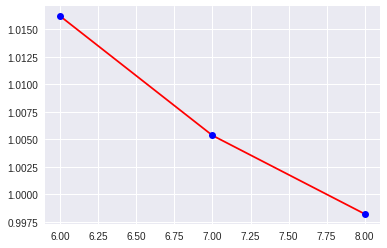

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_values, rmse_values, 'r-')
plt.plot(k_values, rmse_values, 'bo')
plt.show()

Según los resultados: ¿ qué numero de vecinos es mejor para hacer recomendaciones con un menor error de predicción ?

SIETE.

7.- Probar método de recomendación basado en ***ItemKNN***

Replicar todo el análisis de UserKNN con el método ItemKNN

In [0]:
# declarar el objeto recomendador itemKnn
itemKnn = pyreclab.ItemKnn(dataset = 'u1.base',dlmchar = b'\t',header = False,usercol = 0,itemcol = 1, ratingcol = 2 )


In [0]:
# entrenamos el modelo con los datos existentes
# recuerde que en este metodo puede probar el parámetro k de cantidad de vecinos
# así como la métrica de similaridad (pearson, cosine)
itemKnn.train(7,'pearson')

In [85]:
# Predecir rating que el usuario ID 457 le dará al ítem ID 37
itemKnn.predict( "457","37"  )

2.7810769081115723

In [86]:
reclist_item = itemKnn.recommend("457",5)
print(reclist_item)

['1449', '1367', '1642', '119', '1142']


In [87]:
# (pista) recuerde los comandos usados en el método anterior

pelis = np.array(reclist_item).astype(int)
info_file.loc[pelis]['title']

movieid
1449                    Pather Panchali (1955)
1367                              Faust (1994)
1642                  Some Mother's Son (1996)
119     Maya Lin: A Strong Clear Vision (1994)
1142                 When We Were Kings (1996)
Name: title, dtype: object

8.- Probar método de recomendación basado en ***SlopeOne***

In [0]:
# declarar el objeto recomendador itemKnn
slopeOne = pyreclab.SlopeOne(dataset = 'u1.base',dlmchar = b'\t',header = False,usercol = 0,itemcol = 1, ratingcol = 2 )

In [0]:
# entrenamos el modelo con los datos existentes
# recuerde que en este metodo puede probar el parámetro k de cantidad de vecinos
# así como la métrica de similaridad (pearson, cosine)
slopeOne.train(7,'pearson')

In [90]:
# Predecir rating que el usuario ID 457 le dará al ítem ID 37
slopeOne.predict( "457","37"  )

3.214552164077759

In [91]:
reclist_uknn = slopeOne.recommend("457",5)
print(reclist_uknn)

['1500', '1656', '1653', '1651', '1650']


In [92]:
# (pista) recuerde los comandos usados en el método anterior

pelis = np.array(reclist_item).astype(int)
info_file.loc[pelis]['title']

movieid
1449                    Pather Panchali (1955)
1367                              Faust (1994)
1642                  Some Mother's Son (1996)
119     Maya Lin: A Strong Clear Vision (1994)
1142                 When We Were Kings (1996)
Name: title, dtype: object

Replicar todo el análisis de UserKNN con el método SlopeOne
